# Data Pre-processing

In [ ]:
! pip install numpy
! pip install matplotlib
! pip install pandas
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
dataset = pd.read_csv("Data.csv")

# Features and Outcomes

Independent variables - Features 
Dependent variable - what you want to predict - outcomes

Features are the set of data (or columns) based on which you predict the dependent variable.


In [13]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [14]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [16]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Missing Data
if particular values are missing for cetain columns in a row or observation

- delete the observations with missing data
- replace the data with certain value

In [17]:
X[:, 1:3]

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, nan],
       [35.0, 58000.0],
       [nan, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

In [22]:
! pip install scikit-learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [23]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Categorical data and Encoding it

The categorical data needs to be handled as well

You can't compare the categorical data - the data that is not numeric.
Eg. France, Spain and germany.

If we're to specify certain values to this data like array indices, or a dictionary, `{0:France, 1:Germany, 2:Spain}` then the numeric values would be incorrectly manipulated by the ML algos - and would be compared between each other.

Instead, the approach is to encode that 

        F G S
        1 0 0 
        0 1 0 
        0 0 1


## Encode the independent variable

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [26]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

## Encode the dependent variable

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [28]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Split data into Training and Test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [30]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [31]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [32]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [33]:
y_test

array([0, 1])

# Feature Scaling

## Normalization
current val - min val / max val - min val

## Standardization
current val - avg / standard dev

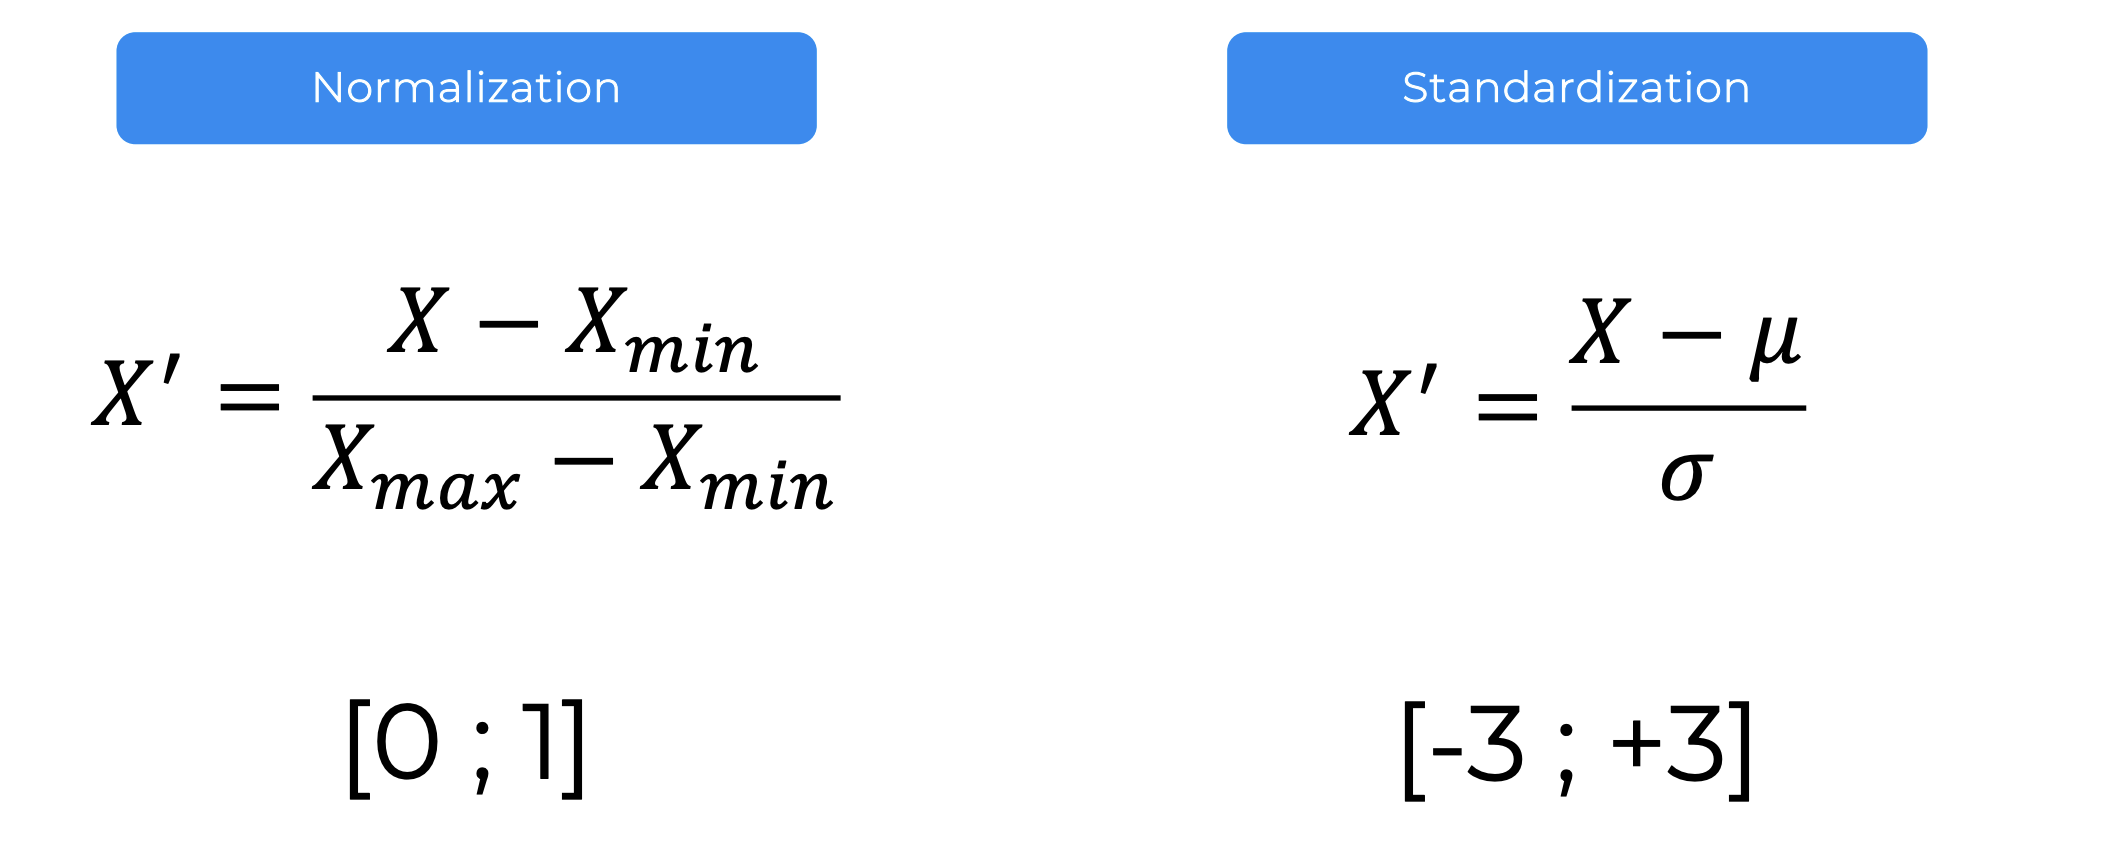


If **Feature Scaling** is applied before the split, there will be information leakage from the train test to test set, because the normalization/standardization will be dependent on the train data as well.
Hence, apply the Feature Scaling after the Train Test split. 

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [35]:
X_train

array([[-0.77459667, -0.57735027,  1.29099445, -0.19159184, -1.07812594],
       [-0.77459667,  1.73205081, -0.77459667, -0.01411729, -0.07013168],
       [ 1.29099445, -0.57735027, -0.77459667,  0.56670851,  0.63356243],
       [-0.77459667, -0.57735027,  1.29099445, -0.30453019, -0.30786617],
       [-0.77459667, -0.57735027,  1.29099445, -1.90180114, -1.42046362],
       [ 1.29099445, -0.57735027, -0.77459667,  1.14753431,  1.23265336],
       [-0.77459667,  1.73205081, -0.77459667,  1.43794721,  1.57499104],
       [ 1.29099445, -0.57735027, -0.77459667, -0.74014954, -0.56461943]])

In [36]:
X_test

array([[-1.,  1.,  0., -1., -1.],
       [ 1., -1.,  0.,  1.,  1.]])